[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<AxesSubplot:>

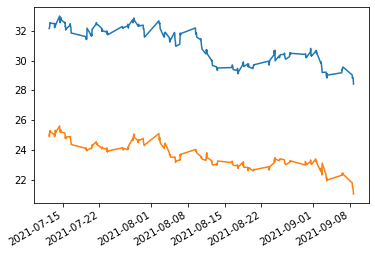

In [36]:
import yfinance as yf

acao1 = yf.download('BBAS3.SA', period = '2mo', interval = '1h')['Adj Close']
acao2 = yf.download('BBDC4.SA', period = '2mo', interval = '1h')['Adj Close']

acao1.plot()
acao2.plot()

In [37]:
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [38]:
x, y = np.array(acao1), np.array(acao2)

In [39]:
model = LinearRegression().fit(x.reshape(-1,1), y)

In [40]:
import pandas as pd
df = pd.DataFrame()
df['acao1'] = acao1
df['acao2'] = acao2

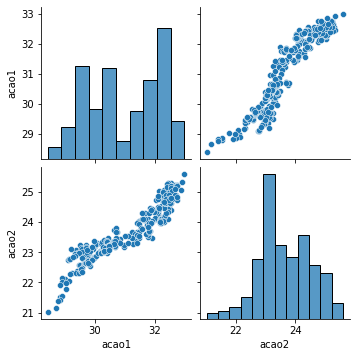

In [41]:
sns.pairplot(df)

In [42]:
y_est = model.predict(acao1.values.reshape(-1,1)) 


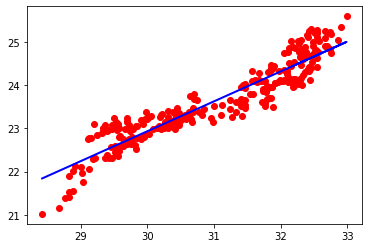

In [43]:
import matplotlib.pyplot as plt
 
plt.scatter(acao1,acao2,color='red')
plt.plot(acao1 ,y_est, color='blue', linewidth=2) 

plt.show()

In [51]:
df1 = pd.DataFrame()
df1['a'] = y - y_est

In [53]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

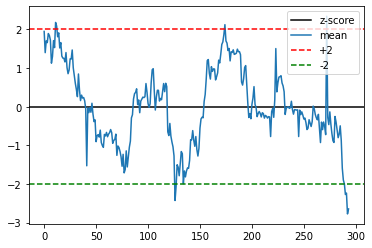

In [92]:
import matplotlib.pyplot as plt
plt.axhline(0, color="black")
plt.plot(zscore(df1))
plt.axhline(2.0, color="red", linestyle="--")
plt.axhline(-2.0, color="green", linestyle="--")
plt.legend(["z-score", "mean", "+2", "-2"])
plt.show()

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_datareader import data
from datetime import datetime
from numpy.random import randn
import statsmodels.tsa.stattools as ts
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [89]:
# Define a function that tests for cointegration between any of the stocks in a DataFrame
def cointegration_finder(dataframe):
    cointegrated = []
    for tick1 in dataframe.columns:
        for tick2 in dataframe.columns:
            if tick1 != tick2:
                Y = np.array(dataframe[tick1])
                X = np.array(dataframe[tick2])
                model = sm.OLS(Y, X)
                result = model.fit()
                beta = result.params
                residuals = Y - beta * X
                cadf = ts.adfuller(residuals)
                p_val = cadf[1]
                if p_val <= 0.05:
                    coin = (tick1, tick2, p_val)
                    cointegrated.append(coin)
    return cointegrated

In [90]:
cointegration_finder(df)

[]